In [96]:
from packaging import version
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import os
import scipy
from collections import defaultdict
from functools import partial
from  matplotlib.ticker import FuncFormatter
import torch
import numpy as np

In [97]:
augs = [
    "sota",
    "last_layer_no_aug",
]
# metric_list = ['f1_score', 'recall', 'precision', 'loss', 'per']
# splits=['dev', 'test']
# parsed_metrics = []
# for split in splits:
#     for metric in metric_list:
#         parsed_metrics.append(f"{split}_{metric}")
metric_list = [
    # 'global-per',
    'global-f1-score',
]

In [98]:
def load_exp(exp_name):
    dir_path = Path(
        "/home/xt0r3-user/cambridge/partii/dissertation/s3prl/s3prl/s3prl/result/downstream/"
    )
    filepath = dir_path / exp_name / "log.log"



    if not (filepath.exists()):
        return {}

    result = defaultdict(list)

    with open(filepath) as f:
        for line in f:
            if line.startswith("mdd/dev"):
                dev_metric_line = line
                dev_metrics_list = dev_metric_line.split("|")
                dev_metrics = dict(
                    [tuple(metric_pair.strip().split(":")) for metric_pair in dev_metrics_list if len(metric_pair.split(":")) == 2]
                )
                for k, v in dev_metrics.items():
                    if k in metric_list:
                        result[k].append(v)

    return result
    # sns.lineplot(dfx, x='step', y='value', hue='name', errorbar=None)

In [99]:
metrics = defaultdict(dict)
for augmentation in augs:
    for i in range(1, 6):
        metrics[augmentation][i]=(load_exp(f"{augmentation}_{i}"))
        # print(f"{i}_{augmentation}")
        # display(dfx.loc['dev_f1_score'].isna().any())
        # print(dfx.loc[metric]['value'])

df = pd.json_normalize(metrics)
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split('.').to_series().apply(tuple))
# display(df)
# display(df.apply(lambda x: [len(xx) for xx in x], axis=1))
df = df.explode(df.columns.tolist())
# df = df.stack(1).droplevel(0, axis=0).astype(float)
df = df.swaplevel(0, 1, axis=1)
df

1                                         2  \
             sota    last_layer_no_aug    last_layer_no_aug   
  global-f1-score      global-f1-score      global-f1-score   
0        2.38e-01   0.2298311444652908  0.23167044595616024   
0        3.47e-01   0.3515439429928741   0.3297918789113666   
0        4.49e-01   0.4597914252607184   0.4314329738058552   
0        4.89e-01   0.4815436241610738    0.475914714398526   
0        5.02e-01  0.49589683470105517  0.49928997443907985   
0        5.11e-01   0.5134257893183829   0.5230953809238152   
0        5.20e-01   0.5214460784313726   0.5258889582033687   
0        5.29e-01   0.5279483037156705   0.5347661188369153   
0        5.37e-01   0.5441316039228092   0.5336721728081322   
0        5.39e-01   0.5406807131280389   0.5336737950845835   
0        5.35e-01   0.5394912985274432   0.5384370015948964   
0        5.47e-01   0.5534012487676636   0.5364281108961959   
0        5.49e-01   0.5439276485788114   0.5451067899266816   
0        5.41e-01   0.5448415374241402   0.5453372055501775   
0        5.56e-01   0.5498191384413023   0.5419229524117838   
0        5.59e-01   0.5607476635514019   0.5438765670202507   
0        5.55e-01   0.5485599464166108   0.5500794912559619   
0        5.61e-01   0.5531219352729649   0.5422965583788999   
0        5.54e-01   0.5596654872949501   0.5487843384906852   
0        5.59e-01   0.5484411666107945    0.546679499518768   

                     3                    4                   5  
     last_layer_no_aug    last_layer_no_aug   last_layer_no_aug  
       global-f1-score      global-f1-score     global-f1-score  
0   0.2298311444652908   0.2298311444652908  0.2298311444652908  
0   0.2856802761576003  0.33494222612256835  0.3493357487922706  
0  0.42965701376052584   0.4598786244099798   0.466619485727766  
0   0.4797028389493234  0.48702702702702705   0.489951113525258  
0   0.5069178687076833   0.5104381064392826  0.5049198763002529  
0   0.5372680255552176   0.5104353011329755  0.5066026410564226  
0   0.5377996312231101   0.5164494103041588  0.5273250239693194  
0   0.5413300186451212   0.5357483317445186  0.5368916797488226  
0   0.5468451242829828   0.5473684210526316   0.545281823939202  
0   0.5523510971786834   0.5339805825242718  0.5459216441875401  
0   0.5515463917525772   0.5374392220421395    0.55254877281309  
0     0.54858934169279   0.5469203482747501   0.546869931884528  
0   0.5531641503372952    0.551227495908347   0.549800796812749  
0   0.5495987158908507   0.5397653194263364  0.5502748140963466  
0   0.5570687418936446   0.5470646113479829  0.5551282051282052  
0     0.55205047318612   0.5570687418936446  0.5455737704918032  
0   0.5537861553461163   0.5466970387243735    0.54871293580971  
0   0.5517896737408933   0.5500158780565259    0.54574951330305  
0   0.5516593613024421   0.5518351577591758  0.5504645946811919  
0   0.5466534784042202   0.5493093478959203  0.5512987012987013

In [116]:
sns.set_theme(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=2, color_codes=False, rc=None)

[Text(0.5, 0, 'F1-score'),
 Text(0, 0.5, 'Epoch'),
 Text(0.5, 1.0, 'F1-score over time')]

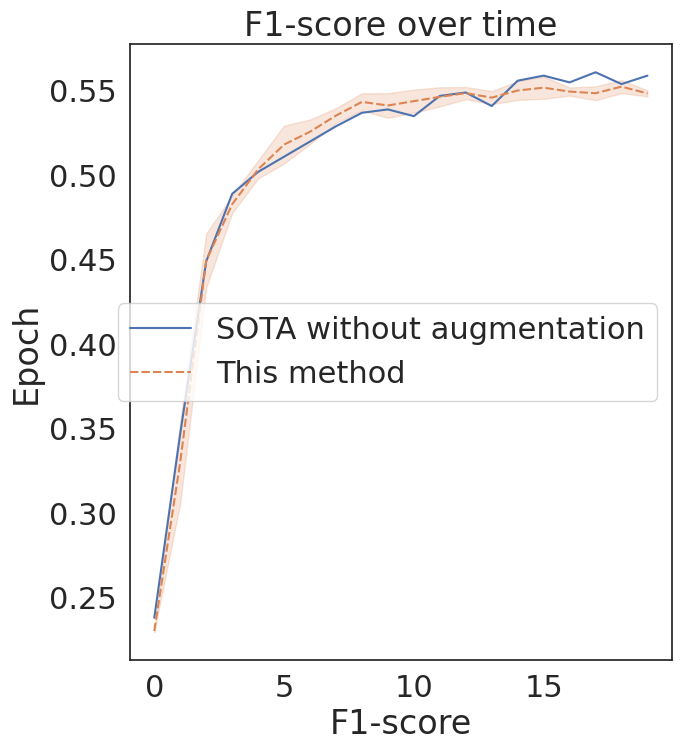

In [119]:
plt.figure(figsize=(7, 8))
dfx = df.reset_index(drop=True).astype(float).droplevel([0, -1], axis=1).rename(
    {'sota': "SOTA without augmentation",
    'last_layer_no_aug': 'This method'},
    axis=1
)
#.plot()
sns.lineplot(dfx, errorbar='sd').set(xlabel='F1-score', ylabel='Epoch', title='F1-score over time')
# sns.lineplot(dfx['sota'], errorbar='sd', legend=True)

In [102]:
scipy.stats.ttest_ind(
    np.zeros(10),
    np.ones(10) + np.random.normal(0, 0.1, 10)
)

Ttest_indResult(statistic=-26.961969099605813, pvalue=5.264658697158085e-16)

In [103]:
splits = ['dev']

In [104]:
results = []
small_augs = list(set(augs) - {"no_aug"})
for augmentation in small_augs:
    cur_res = []
    for split in splits:
        for metric in metric_list:
            result = scipy.stats.ttest_ind(
                df[(split, "no_aug", metric)],
                df[(split, augmentation, metric)],
            )
            cur_res.append(result.pvalue)
            cur_res.append(result.statistic)
    results.append(cur_res)

KeyError: ('dev', 'no_aug', 'global-f1-score')

In [ ]:
results[0]

[2.060734944628363e-09,
 29.179081488489587,
 0.0008157258298967192,
 5.20667864954108,
 0.0006618785415220475,
 -5.379695398829574,
 0.04663772365992695,
 2.3505976901726866,
 0.4753589381836367,
 -0.748898473116133,
 0.03496220957684032,
 2.53536402713336,
 0.9456242107479784,
 0.07037291675547921,
 1.936962627938777e-09,
 29.407792254423782,
 0.010886370808794723,
 3.298302569820482,
 0.008987178142600418,
 -3.427556336563324,
 0.1653027424056223,
 1.5269002245917411,
 0.6217267604407255,
 -0.5131293679101205,
 0.0022927686422918414,
 4.3980356658078295,
 0.012698733146719684,
 -3.19545872815192]

In [ ]:
res_df = pd.DataFrame(
    results,
    index=small_augs,
    columns=pd.MultiIndex.from_product([splits, metric_list, ["pvalue", "statistic"]]),
)#.loc(axis=1)[:, :, "pvalue"]

res_df.sort_values(by=('test', 'global-precision', 'pvalue')).style.highlight_between(color="green", right=0.05)

In [ ]:
import re
latex = res_df.loc['phase_specaug', 'test'].sort_values().to_frame().T.loc(axis=1)[metric_list, 'pvalue'].to_latex(float_format="%.2E")

latex = re.sub(
    r"(\d*)(\d).(\d)\d+E-01",
    r"\1.\2\3",
    latex
)

# latex = re.sub(
#     r"(\d*)(\d\d).\d+E-02",
#     r"\1.\2",
#     latex
# )

latex = re.sub(
    r"E(-\d+)",
    r"\\cdot 10^{\1}",
    latex
)

latex = latex.replace(' .', ' 0.') 


print(latex)

\begin{tabular}{lrrrrrrr}
\toprule
 & loss & global-per & global-precision & global-recall & global-f1-score & insertions & deletions \\
 & pvalue & pvalue & pvalue & pvalue & pvalue & pvalue & pvalue \\
\midrule
phase_specaug & 5.29\cdot 10^{-09} & 3.30\cdot 10^{-06} & 5.51\cdot 10^{-04} & 6.03\cdot 10^{-07} & 7.24\cdot 10^{-03} & 3.32\cdot 10^{-08} & 9.79\cdot 10^{-07} \\
\bottomrule
\end{tabular}



In [ ]:
df.mean(axis=0).loc[:,:, metric_list].to_frame().unstack(1).droplevel(0, axis=1)[['no_aug', 'phase_specaug']]

no_aug  phase_specaug
dev  loss                25.896347      21.143594
     global-per           0.171934       0.183051
     global-precision     0.477843       0.459646
     global-recall        0.678948       0.673188
     global-f1-score      0.560865       0.546265
     insertions         243.400000     439.800000
     deletions          357.800000    1843.600000
test loss                25.379725      22.317811
     global-per           0.170103       0.190133
     global-precision     0.476708       0.452162
     global-recall        0.626291       0.735460
     global-f1-score      0.541321       0.559995
     insertions         724.400000     150.400000
     deletions         1085.600000     604.200000

In [ ]:

df.std(axis=0).loc[:,:, metric_list].to_frame().unstack(1).droplevel(0, axis=1)[['no_aug', 'phase_specaug']]

no_aug  phase_specaug
dev  loss               0.298530       0.277849
     global-per         0.002173       0.002447
     global-precision   0.007078       0.002854
     global-recall      0.018831       0.007352
     global-f1-score    0.010236       0.001973
     insertions        16.652327      46.986168
     deletions         19.728152     104.567203
test loss               0.211259       0.158849
     global-per         0.001594       0.003614
     global-precision   0.005661       0.008143
     global-recall      0.016557       0.004813
     global-f1-score    0.009312       0.007052
     insertions        58.140347      23.006521
     deletions         73.961476      32.957548

In [ ]:

df.std(axis=0).loc[:,:, metric_list].to_frame().unstack(1)

0                                   \
                       add_noise add_reverb    neftune     no_aug   
dev  loss               0.265148   0.330993   0.257717   0.298530   
     global-per         0.002228   0.001865   0.001898   0.002173   
     global-precision   0.004268   0.002976   0.006140   0.007078   
     global-recall      0.009566   0.011498   0.011702   0.018831   
     global-f1-score    0.004753   0.005294   0.007701   0.010236   
     insertions         9.523655   9.565563  19.907285  16.652327   
     deletions         22.423202  19.917329  21.621748  19.728152   
test loss               0.131063   0.239976   0.286042   0.211259   
     global-per         0.001348   0.001620   0.001667   0.001594   
     global-precision   0.002762   0.004441   0.003596   0.005661   
     global-recall      0.009358   0.014437   0.012126   0.016557   
     global-f1-score    0.004326   0.007724   0.006738   0.009312   
     insertions        30.169521  36.318040  73.018491  58.140347   
     deletions         75.616136  61.144910  99.706068  73.961476   

                                                                    \
                      phase_perturbation phase_specaug     specaug   
dev  loss                       0.473675      0.277849    0.258930   
     global-per                 0.001665      0.002447    0.003708   
     global-precision           0.004749      0.002854    0.008332   
     global-recall              0.006640      0.007352    0.015184   
     global-f1-score            0.004700      0.001973    0.008534   
     insertions                 6.760178     46.986168   12.660964   
     deletions                  7.893035    104.567203   38.336667   
test loss                       0.424296      0.158849    0.172682   
     global-per                 0.000748      0.003614    0.001660   
     global-precision           0.002688      0.008143    0.001705   
     global-recall              0.007719      0.004813    0.011632   
     global-f1-score            0.003008      0.007052    0.004212   
     insertions                24.843510     23.006521   40.078673   
     deletions                 32.194720     32.957548  109.548163   

                                                                         
                      tempo_perturbation timedomain_specaug        vltp  
dev  loss                       0.149850           0.512467    0.289352  
     global-per                 0.001015           0.002328    0.001699  
     global-precision           0.002589           0.007552    0.005428  
     global-recall              0.010909           0.016259    0.012227  
     global-f1-score            0.005121           0.009559    0.006670  
     insertions                15.984367          21.149468    9.316652  
     deletions                 22.720035          29.305290   23.805462  
test loss                       0.250773           0.151518    0.130132  
     global-per                 0.002085           0.001253    0.003373  
     global-precision           0.005557           0.004719    0.006131  
     global-recall              0.011356           0.014905    0.007649  
     global-f1-score            0.005864           0.008582    0.004222  
     insertions                52.208237          72.545158   36.300138  
     deletions                 60.135680         107.308900  153.443801

In [ ]:
df.std(axis=0).loc[:, metric_list].to_frame().unstack(1)

KeyError: 'loss'

In [ ]:
df['dev', 'no_aug', 'global-f1-score'].describe()

count    5.000000
mean     0.560865
std      0.010236
min      0.547410
25%      0.554817
50%      0.563094
75%      0.564637
max      0.574366
Name: (dev, no_aug, global-f1-score), dtype: float64

In [ ]:
scipy.stats.ttest_1samp(
    df['test', 'no_aug', 'global-f1-score'], 0.511
)

TtestResult(statistic=7.2808374176615915, pvalue=0.001890997866842336, df=4)

In [ ]:
scipy.stats.ttest_1samp(
    df['dev', 'no_aug', 'global-f1-score'], 0.554
)

TtestResult(statistic=1.4996315078826847, pvalue=0.20809058064776875, df=4)

In [ ]:
import re
latex = res_df.sort_values(by=('global-precision', 'pvalue')).to_latex(float_format="%.2E")

latex = re.sub(
    r"(\d*)(\d).(\d)\d+E-01",
    r"\1.\2\3",
    latex
)

# latex = re.sub(
#     r"(\d*)(\d\d).\d+E-02",
#     r"\1.\2",
#     latex
# )

latex = re.sub(
    r"E-(\d+)",
    r"\\cdot 10^{\1}",
    latex
)

latex = latex.replace(' .', ' 0.') 


print(latex)

\begin{tabular}{lrrrr}
\toprule
 & loss & global-per & global-precision & global-f1-score \\
 & pvalue & pvalue & pvalue & pvalue \\
\midrule
tempo_perturbation & 2.06\cdot 10^{09} & 8.16\cdot 10^{04} & 6.62\cdot 10^{04} & 0.47 \\
add_noise & 4.15\cdot 10^{11} & 1.54\cdot 10^{03} & 1.13\cdot 10^{03} & 0.24 \\
timedomain_specaug & 2.01\cdot 10^{09} & 2.21\cdot 10^{04} & 2.07\cdot 10^{03} & 0.38 \\
vltp & 8.12\cdot 10^{11} & 9.39\cdot 10^{03} & 0.12 & 0.95 \\
specaug & 1.34\cdot 10^{10} & 0.47 & 0.29 & 0.61 \\
phase_perturbation & 0.64 & 0.18 & 0.32 & 0.76 \\
add_reverb & 0.78 & 0.67 & 0.74 & 0.72 \\
neftune & 0.15 & 0.97 & 0.99 & 0.91 \\
\bottomrule
\end{tabular}



In [ ]:

pd.DataFrame(results, index=small_augs, columns=pd.MultiIndex.from_product([splits, metric_list, ['pvalue', 'statistic']])).loc(axis=1)[:, :, 'statistic'].style.highlight_between(color='green', right=-2)

In [ ]:
history['dev_f1_score']

{'no_aug':                  value     value     value     value     value
 name                                                          
 dev_f1_score  0.215067  0.215067  0.215067  0.215067  0.215067
 dev_f1_score  0.332019  0.350584  0.332261  0.354291  0.333627
 dev_f1_score  0.420848  0.422394  0.423157  0.419827  0.403038
 dev_f1_score  0.439772  0.439102  0.441836  0.444779  0.446130
 dev_f1_score  0.449109  0.453909  0.467823  0.463020  0.462648
 dev_f1_score  0.475060  0.473828  0.473355  0.464969  0.470080
 dev_f1_score  0.469087  0.465080  0.476381  0.465071  0.465545
 dev_f1_score  0.475259  0.469748  0.472473  0.477386  0.478762
 dev_f1_score  0.469250  0.469653  0.477214  0.469311  0.477726
 dev_f1_score  0.474970  0.459324  0.466042  0.468981  0.458850
 dev_f1_score  0.469040  0.455154  0.469467  0.460885  0.470943
 dev_f1_score  0.487167  0.474538  0.480460  0.482970  0.472384
 dev_f1_score  0.480514  0.470660  0.486818  0.472433  0.479260
 dev_f1_score  0.473809  0.473

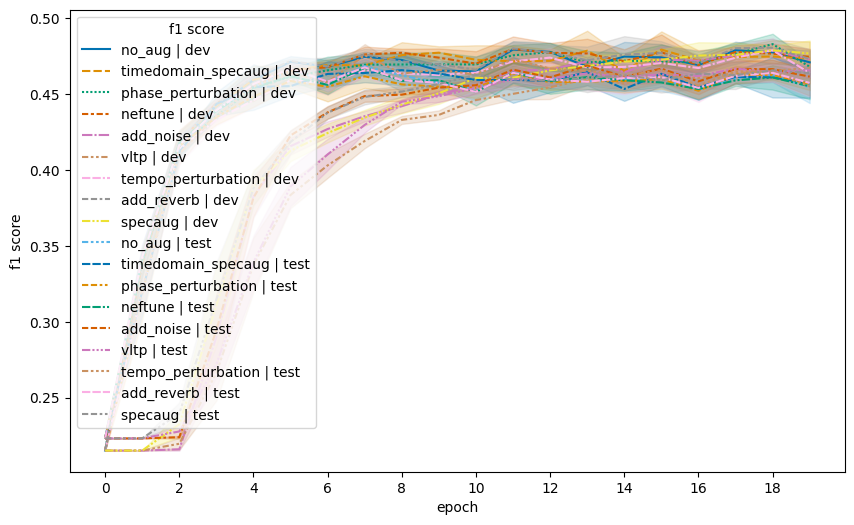

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
histories = [
            history[f"{split}_f1_score"][aug]
            .reset_index(drop=True)
            .rename(columns=lambda col: f"{aug} | {split}")
            .rename_axis(index="epoch", columns='f1 score')
    for split in ['dev', 'test']
    for aug in augs
]

sns.lineplot(
            pd.concat(histories, axis=1),
            errorbar="sd",
            palette='colorblind'
        ).set(ylabel='f1 score',
xticks=list(range(0, 20, 2)))

plt.savefig('f1_scores.png')

# plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

In [ ]:
scipy.stats.ttest_ind(
    history['test_f1_score']['phase_perturbation'].iloc[3],
    history['test_f1_score']['phase_perturbation'].iloc[15],
)

Ttest_indResult(statistic=-6.443249188943741, pvalue=0.0001997351606865684)

In [ ]:
history['test_f1_score']['phase_perturbation'].iloc[3]

value    0.427270
value    0.435995
value    0.432710
value    0.437449
value    0.441288
Name: test_f1_score, dtype: float64

In [ ]:
history['test_f1_score']['phase_perturbation'].iloc[19]

value    0.453385
value    0.456980
value    0.451419
value    0.460759
value    0.461572
Name: test_f1_score, dtype: float64